# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = 'output_data/cities.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1000)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

455

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []

# Loop through cities making the API call
i = 1
for city in cities:
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city
    response= requests.get(query_url).json()
  
    try:
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f"Processing record {i}|{city}")
        i+=1
        
    except (KeyError):
        print("City name not available.")



Processing record 1|sioux lookout
Processing record 2|tsiroanomandidy
Processing record 3|jawhar
Processing record 4|caravelas
Processing record 5|kapaa
Processing record 6|enshi
Processing record 7|longyearbyen
Processing record 8|mataura
Processing record 9|palmer
City name not available.
City name not available.
Processing record 10|kodiak
Processing record 11|mar del plata
Processing record 12|dunedin
Processing record 13|rexburg
Processing record 14|vaini
Processing record 15|andros town
Processing record 16|mahebourg
Processing record 17|hithadhoo
Processing record 18|port hedland
Processing record 19|geraldton
Processing record 20|upernavik
Processing record 21|luderitz
Processing record 22|katherine
Processing record 23|castro
Processing record 24|mount gambier
Processing record 25|vao
Processing record 26|marfino
Processing record 27|balykshi
Processing record 28|carnarvon
Processing record 29|busselton
Processing record 30|hermanus
Processing record 31|bredasdorp
Processing r

Processing record 241|beyneu
Processing record 242|vila
Processing record 243|leningradskiy
City name not available.
Processing record 244|eureka
Processing record 245|faya
Processing record 246|gurupa
Processing record 247|cornereva
City name not available.
Processing record 248|lagos
Processing record 249|purpe
Processing record 250|ancud
Processing record 251|olinda
Processing record 252|mapiri
Processing record 253|lebu
Processing record 254|port augusta
Processing record 255|te anau
Processing record 256|marawi
Processing record 257|agadir
Processing record 258|lata
Processing record 259|methoni
Processing record 260|itarema
Processing record 261|nador
Processing record 262|wakkanai
Processing record 263|oriximina
Processing record 264|asau
Processing record 265|mandalgovi
Processing record 266|san juan
Processing record 267|sistranda
Processing record 268|verkhnetulomskiy
Processing record 269|boende
Processing record 270|new norfolk
Processing record 271|quanzhou
Processing reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_df = pd.DataFrame({"City": city_name, 
                        "Cloudiness": cloudiness, 
                        "Country": country, 
                        "Date": date, 
                        "Humidity":humidity,
                        "Lat": lat,
                        "Lng": lng,
                        "Max Temp": max_temp,
                        "Wind Speed": wind_speed
                                         })

city_df = city_df.rename_axis('City ID')

city_df.head(20)


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City ID,,,,,,,,,
0,Sioux Lookout,75,CA,1613874961,58,50.1001,-91.9170,21.20,8.05
1,Tsiroanomandidy,78,MG,1613875236,94,-18.7667,46.0333,68.43,2.42
2,Giohar,100,SO,1613875236,92,2.7809,45.5005,68.58,8.23
3,Caravelas,100,BR,1613875236,84,-17.7125,-39.2481,78.37,7.27
4,Kapaa,40,US,1613875236,73,22.0752,-159.3190,77.00,14.97
5,Enshi,63,CN,1613875236,47,30.3000,109.4833,64.76,0.85
6,Longyearbyen,20,SJ,1613875237,68,78.2186,15.6401,23.00,12.66
7,Mataura,0,NZ,1613875237,54,-46.1927,168.8643,73.00,10.00
8,Palmer,90,US,1613875237,54,42.1584,-72.3287,26.60,10.36


In [7]:
city_csv=city_df.to_csv("../Output/city.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.
clean_df = city_df.loc[city_df["Humidity"]>100]
clean_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City ID,,,,,,,,,


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

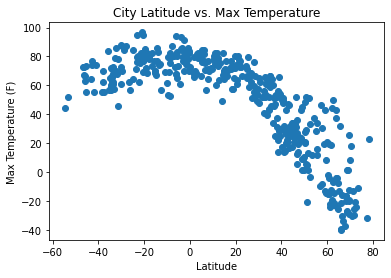

In [10]:
plt.scatter(city_df['Lat'],city_df['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature')
plt.show()

## Latitude vs. Humidity Plot

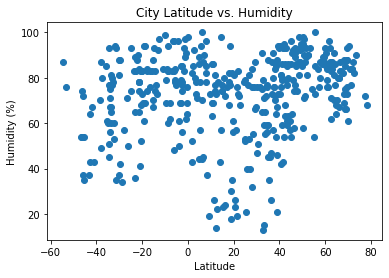

In [11]:
plt.scatter(city_df['Lat'],city_df['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity')
plt.show()

## Latitude vs. Cloudiness Plot

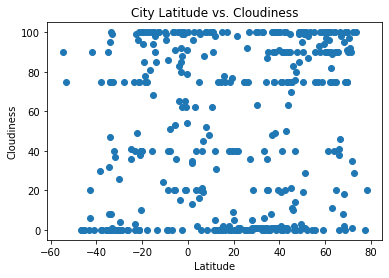

In [12]:
plt.scatter(city_df['Lat'],city_df['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness')
plt.show()

## Latitude vs. Wind Speed Plot

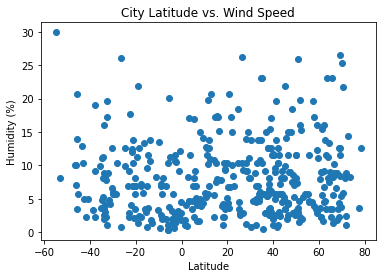

In [13]:
plt.scatter(city_df['Lat'],city_df['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Wind Speed')
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [14]:
north = city_df.loc[city_df["Lat"] >= 0]
north_df = pd.DataFrame(north)

south = city_df.loc[city_df["Lat"] < 0]
south_df = pd.DataFrame(south)


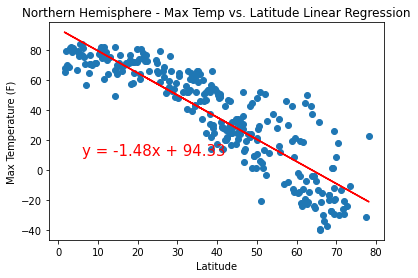

In [15]:
x_value1=north['Lat']
y_value1=north['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value1, y_value1)
regress_values = x_value1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value1,y_value1)
plt.plot(x_value1,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

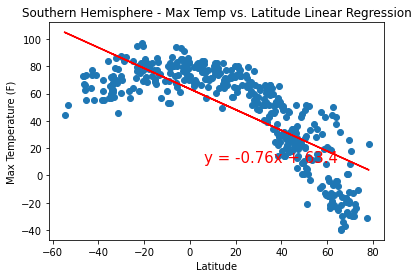

In [26]:
x_value2=city_df['Lat']
y_value2=city_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value2, y_value2)
regress_values = x_value2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value2,y_value2)
plt.plot(x_value2,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

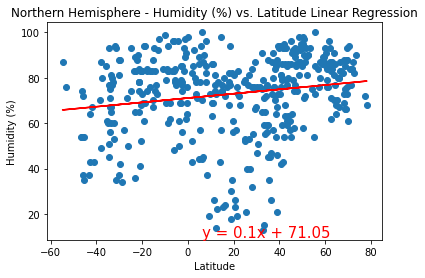

In [17]:
x_value3=city_df['Lat']
y_value3=city_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value3, y_value3)
regress_values = x_value3 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value3,y_value3)
plt.plot(x_value3,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

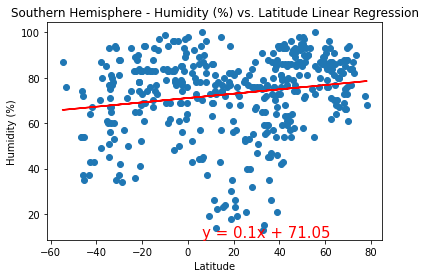

In [28]:
x_value4=city_df['Lat']
y_value4=city_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value4, y_value4)
regress_values = x_value4 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value4,y_value4)
plt.plot(x_value4,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

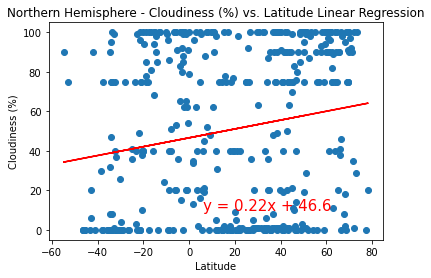

In [34]:
x_value5= city_df['Lat']
y_value5= city_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value5, y_value5)
regress_values = x_value5 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value5,y_value5)
plt.plot(x_value5,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

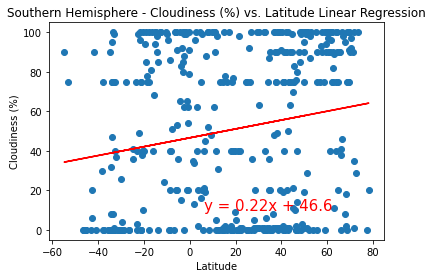

In [30]:
x_value6=city_df['Lat']
y_value6=city_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value6, y_value6)
regress_values = x_value6 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value6,y_value6)
plt.plot(x_value6,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

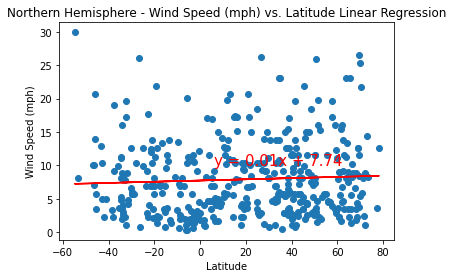

In [31]:
x_value7=city_df['Lat']
y_value7=city_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value7, y_value7)
regress_values = x_value7 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value7,y_value7)
plt.plot(x_value7,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

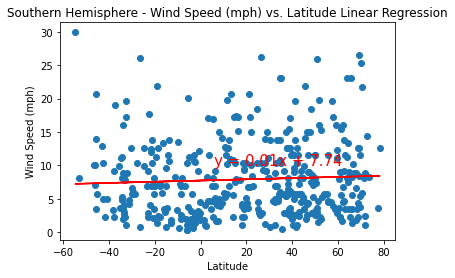

In [33]:
x_value8=city_df['Lat']
y_value8=city_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value8, y_value8)
regress_values = x_value8 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value8,y_value8)
plt.plot(x_value8,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.show()